# Dataset importing

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report, confusion_matrix

#  Caricamento e preprocessing dei dati

In [2]:
img_height, img_width = 150, 150
batch_size = 32

# Generatore per dati di training con augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=10,
    zoom_range=0.1,
    horizontal_flip=True
)

train_generator = train_datagen.flow_from_directory(
    "C:\\Users\\HP\\Downloads\\archive (3)\\Training",
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical'
)

# Generatore per dati di test (no augmentation)
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    "C:\\Users\\HP\\Downloads\\archive (3)\\Training",
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False  # Importante per l'analisi finale
)

Found 5712 images belonging to 4 classes.
Found 5712 images belonging to 4 classes.


# Definizione del modello CNN

In [3]:
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(img_height,img_width,3)),
    MaxPooling2D(2,2),
    
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(4, activation='softmax')  # 4 classi (glioma, meningioma, notumor, pituitary)
])

model.compile(optimizer=Adam(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

C:\Users\HP\anaconda32\envs\tf-env\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 148, 148, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 74, 74, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 72, 72, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 36, 36, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 34, 34, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 17, 17, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 36992)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       4,735,104 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 4)                   │             516 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,828,868 (18.42 MB)

 Trainable params: 4,828,868 (18.42 MB)

 Non-trainable params: 0 (0.00 B)

# Training del modello

In [4]:
history = model.fit(
    train_generator,
    epochs=20,
    validation_data=test_generator
)

C:\Users\HP\anaconda32\envs\tf-env\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
179/179 ━━━━━━━━━━━━━━━━━━━━ 249s 1s/step - accuracy: 0.4877 - loss: 1.1027 - val_accuracy: 0.7398 - val_loss: 0.7076
Epoch 2/20
179/179 ━━━━━━━━━━━━━━━━━━━━ 156s 872ms/step - accuracy: 0.7261 - loss: 0.7092 - val_accuracy: 0.7792 - val_loss: 0.5545
Epoch 3/20
179/179 ━━━━━━━━━━━━━━━━━━━━ 156s 869ms/step - accuracy: 0.7676 - loss: 0.5998 - val_accuracy: 0.8186 - val_loss: 0.5254
Epoch 4/20
179/179 ━━━━━━━━━━━━━━━━━━━━ 161s 900ms/step - accuracy: 0.7932 - loss: 0.5495 - val_accuracy: 0.8433 - val_loss: 0.4127
Epoch 5/20
179/179 ━━━━━━━━━━━━━━━━━━━━ 156s 869ms/step - accuracy: 0.8129 - loss: 0.5157 - val_accuracy: 0.8591 - val_loss: 0.4017
Epoch 6/20
179/179 ━━━━━━━━━━━━━━━━━━━━ 156s 869ms/step - accuracy: 0.8246 - loss: 0.4674 - val_accuracy: 0.8435 - val_loss: 0.4350
Epoch 7/20
179/179 ━━━━━━━━━━━━━━━━━━━━ 153s 856ms/step - accuracy: 0.8247 - loss: 0.4362 - val_accuracy: 0.8843 - val_loss: 0.3338
Epoch 8/20
179/179 ━━━━━━━━━━━━━━━━━━━━ 204s 865ms/step - accuracy: 0.8392 - lo

In [9]:
import keras.saving
keras.saving.save_model(model, 'model.keras')

# Valutazione delle performance

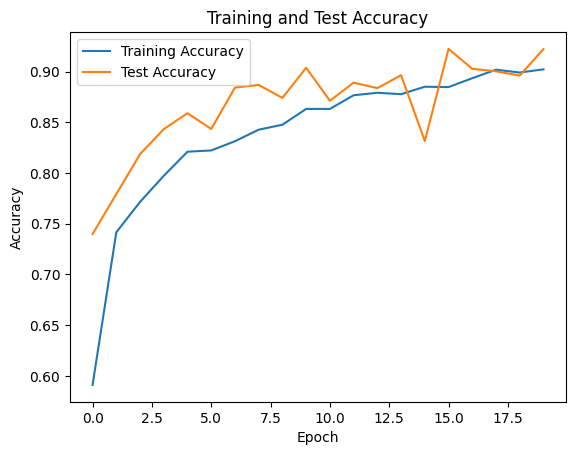

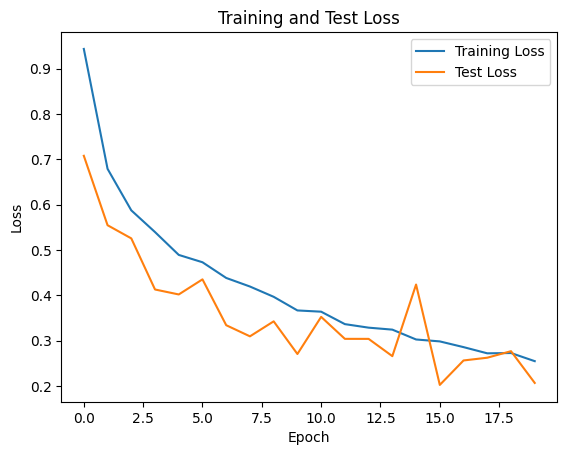

In [10]:
# Grafico Accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Test Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Test Accuracy')
plt.show()

# Grafico Loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Test Loss')
plt.show()

### Matrice di confusione e classification report

179/179 ━━━━━━━━━━━━━━━━━━━━ 34s 191ms/step


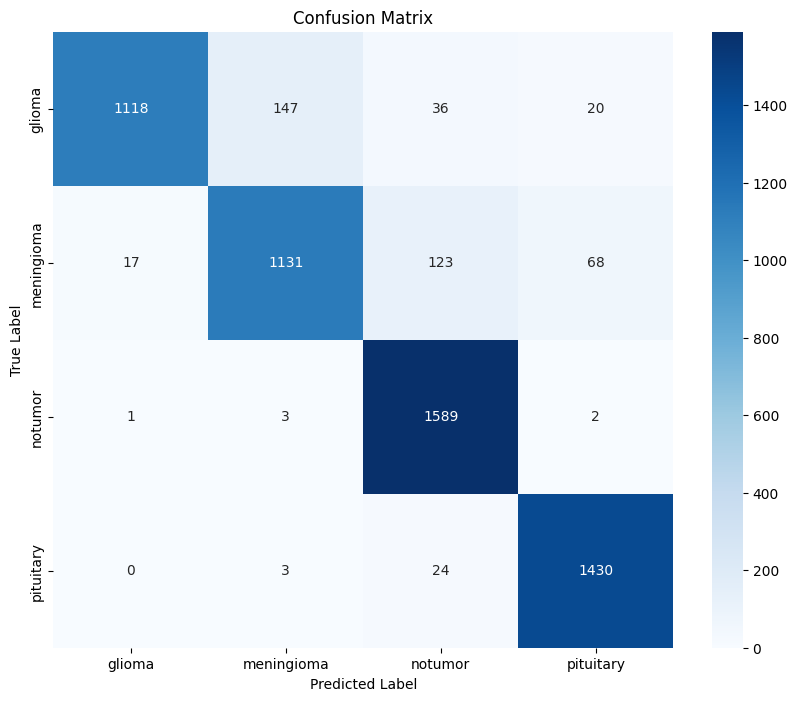

              precision    recall  f1-score   support

      glioma       0.98      0.85      0.91      1321
  meningioma       0.88      0.84      0.86      1339
     notumor       0.90      1.00      0.94      1595
   pituitary       0.94      0.98      0.96      1457

    accuracy                           0.92      5712
   macro avg       0.93      0.92      0.92      5712
weighted avg       0.92      0.92      0.92      5712



In [11]:
# Predizioni
test_generator.reset()
predictions = model.predict(test_generator, verbose=1)
y_pred_classes = np.argmax(predictions, axis=1)

# Matrice di confusione
cm = confusion_matrix(test_generator.classes, y_pred_classes)
plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, fmt='d',
            xticklabels=test_generator.class_indices.keys(),
            yticklabels=test_generator.class_indices.keys(), cmap='Blues')

plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Classification report
print(classification_report(test_generator.classes, y_pred_classes, 
                            target_names=test_generator.class_indices.keys()))


### Vediamo come si comporta il modello con immagini non presenti nel training set o nel test set

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step


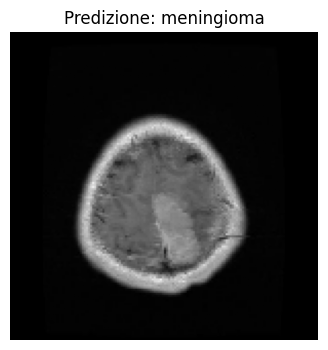

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


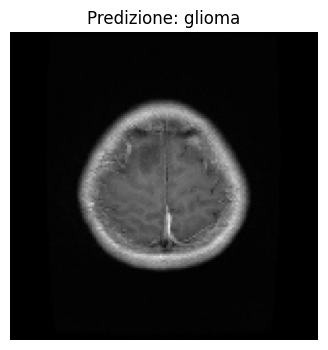

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


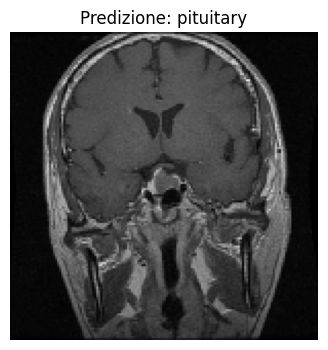

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


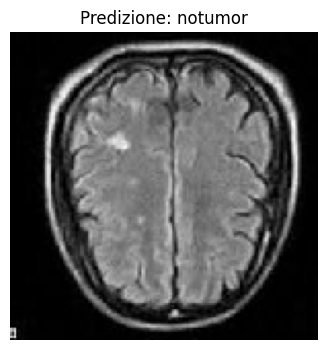

In [13]:
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
import numpy as np
import os


model = load_model("modello_tumori.h5")

# Parametri del modello (devono coincidere con quelli usati in addestramento)
img_height, img_width = 150, 150

# Lista dei file delle 4 immagini
image_paths = [
    "C:\\Users\\HP\\Downloads\\Tr-me_1310.jpg",
    "C:\\Users\\HP\\Downloads\\Tr-gl_1305.jpg",
    "C:\\Users\\HP\\Downloads\\Tr-pi_1452.jpg",
    "C:\\Users\\HP\\Downloads\\Tr-no_1581.jpg"
]

# Mapping classi (prendilo direttamente da train_generator se vuoi precisione)
# Se train_generator.class_indices = {'glioma': 0, 'meningioma': 1, 'notumor': 2, 'pituitary': 3}
class_names = ['glioma', 'meningioma', 'notumor', 'pituitary']

# Ciclo su ogni immagine
for path in image_paths:
    img = image.load_img(path, target_size=(img_height, img_width))
    img_array = image.img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)  # Shape: (1, 150, 150, 3)

    # Predizione
    predictions = model.predict(img_array)
    predicted_class = np.argmax(predictions[0])
    predicted_label = class_names[predicted_class]

    # Visualizzazione
    plt.figure(figsize=(4, 4))
    plt.imshow(img_array[0])
    plt.axis('off')
    plt.title(f"Predizione: {predicted_label}")
    plt.show()